# Classificação com Árvore de Decisão

In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree # Ferramenta para visualizar a árvore

# 1. Usando exatamente os mesmos dados de antes
emails = pd.DataFrame({
    'contem_oferta': [1, 0, 0, 1, 0, 1, 0, 0, 1, 1], # 1 se tem "oferta", "grátis", etc.
    'erros_gramaticais': [1, 0, 1, 1, 0, 0, 0, 1, 0, 1], # 1 se tem muitos erros
    'eh_spam': [1, 0, 0, 1, 0, 1, 0, 0, 1, 1] # 1 = SPAM, 0 = NÃO SPAM (nosso target)
})

X_email = emails[['contem_oferta', 'erros_gramaticais']]
y_email = emails['eh_spam']

# 2. Criando e treinando o modelo de Árvore de Decisão
# O 'max_depth=2' limita a profundidade da árvore para não ficar muito complexa e fácil de visualizar.
modelo_arvore = DecisionTreeClassifier(max_depth=2, random_state=42)
modelo_arvore.fit(X_email, y_email)

# 3. Prevendo para o mesmo novo e-mail
novo_email = pd.DataFrame([[1, 1]],  columns=['contem_oferta', 'erros_gramaticais']) # Um e-mail com "oferta" e com erros gramaticais
previsao_arvore = modelo_arvore.predict(novo_email)

print(f"--- Previsão com Árvore de Decisão ---")
print(f"Previsão do Modelo de Árvore: {'É SPAM' if previsao_arvore[0] == 1 else 'Não é Spam'}")

# Avaliando a acurácia do modelo nos próprios dados de treino (apenas para exemplo)
acuracia_arvore = accuracy_score(y_email, modelo_arvore.predict(X_email))
print(f"Acurácia da Árvore nos dados de treino: {acuracia_arvore * 100:.2f}%")

--- Previsão com Árvore de Decisão ---
Previsão do Modelo de Árvore: É SPAM
Acurácia da Árvore nos dados de treino: 100.00%


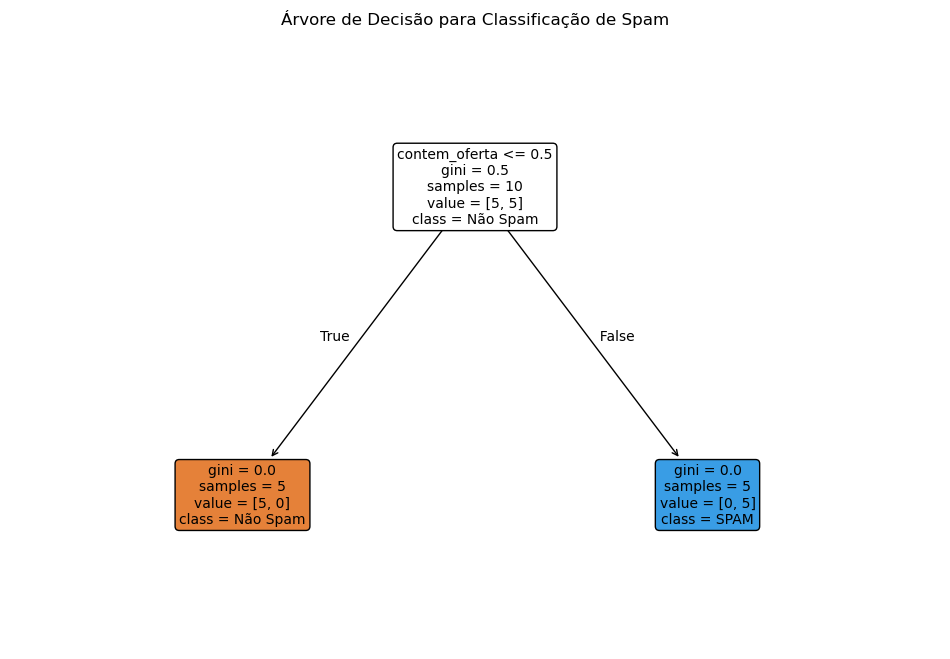

In [2]:
# Criando a visualização da árvore
plt.figure(figsize=(12, 8)) # Define um bom tamanho para a figura

plot_tree(modelo_arvore,
          feature_names=X_email.columns, # Nomes das nossas features
          class_names=['Não Spam', 'SPAM'], # Nomes do nosso target
          filled=True, # Preenche os nós com cores
          rounded=True, # Deixa os nós com cantos arredondados
          fontsize=10)

plt.title("Árvore de Decisão para Classificação de Spam")
plt.show()
